# Weather Images Classification (Rain, Cloudy, Shine, Sunrise)

- **Credit**: fastai & its notebook [01_intro.ipynb](https://github.com/fastai/fastbook/blob/master/01_intro.ipynb)
- **Dataset**: [Multi-class Weather Dataset for Image Classification](https://data.mendeley.com/datasets/4drtyfjtfy/1) (link from [Top 10 Image Classification Datasets for Machine Learning](https://lionbridge.ai/datasets/top-10-image-classification-datasets-for-machine-learning/))
- **Author**: [Pierre GUILLOU](https://www.linkedin.com/in/pierreguillou/)
- **Date**: 01/03/2021

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *

## Original code from fastai notebook 01_intro.ipynb

In [ ]:
# CLICK ME
# from fastai.vision.all import *
# path = untar_data(URLs.PETS)/'images'

# def is_cat(x): return x[0].isupper()
# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), valid_pct=0.2, seed=42,
#    label_func=is_cat, item_tfms=Resize(224))

# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(1)

## Use of the fastai code with another dataset

### 1. Import fastai vision library

In [3]:
from fastai.vision.all import *

### 2. Get path to images

In [5]:
!mkdir MyImages
%cd MyImages

/notebooks/clean/MyImages


In [6]:
import requests # This library is used to make requests to internet

# We are storing url of dataset
url = 'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip'
# We are creating a requests variable with the above url
r = requests.get(url, allow_redirects=True)
# We are writing the content of above request to 'iris.data' file
open('4drtyfjtfy-1.zip', 'wb').write(r.content)

95592747

In [7]:
!unzip 4drtyfjtfy-1.zip

Archive:  4drtyfjtfy-1.zip
  inflating: dataset2.zip            


In [8]:
!unzip dataset2.zip

Archive:  dataset2.zip
   creating: dataset2/
  inflating: dataset2/cloudy1.jpg    
  inflating: dataset2/cloudy10.jpg   
  inflating: dataset2/cloudy100.jpg  
  inflating: dataset2/cloudy101.jpg  
  inflating: dataset2/cloudy102.jpg  
  inflating: dataset2/cloudy103.jpg  
  inflating: dataset2/cloudy104.jpg  
  inflating: dataset2/cloudy105.jpg  
  inflating: dataset2/cloudy106.jpg  
  inflating: dataset2/cloudy107.jpg  
  inflating: dataset2/cloudy108.jpg  
  inflating: dataset2/cloudy109.jpg  
  inflating: dataset2/cloudy11.jpg   
  inflating: dataset2/cloudy110.jpg  
  inflating: dataset2/cloudy111.jpg  
  inflating: dataset2/cloudy112.jpg  
  inflating: dataset2/cloudy113.jpg  
  inflating: dataset2/cloudy114.jpg  
  inflating: dataset2/cloudy115.jpg  
  inflating: dataset2/cloudy116.jpg  
  inflating: dataset2/cloudy117.jpg  
  inflating: dataset2/cloudy118.jpg  
  inflating: dataset2/cloudy119.jpg  
  inflating: dataset2/cloudy12.jpg   
  inflating: dataset2/cloudy120.jpg  
  in

In [9]:
!ls

4drtyfjtfy-1.zip  dataset2  dataset2.zip


In [10]:
%cd ../..

/notebooks


In [11]:
from pathlib import Path
path = Path.cwd()
path_imgs = path/'MyImages/dataset2'
path_imgs

Path('/notebooks/MyImages/dataset2')

In [12]:
path_imgs.ls()

(#1125) [Path('/notebooks/MyImages/dataset2/rain89.jpg'),Path('/notebooks/MyImages/dataset2/shine153.jpg'),Path('/notebooks/MyImages/dataset2/cloudy207.jpg'),Path('/notebooks/MyImages/dataset2/sunrise196.jpg'),Path('/notebooks/MyImages/dataset2/shine106.jpg'),Path('/notebooks/MyImages/dataset2/rain195.jpg'),Path('/notebooks/MyImages/dataset2/rain142.jpg'),Path('/notebooks/MyImages/dataset2/shine46.jpg'),Path('/notebooks/MyImages/dataset2/rain143.jpg'),Path('/notebooks/MyImages/dataset2/cloudy8.jpg')...]

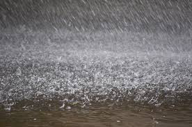

In [84]:
img = PILImage.create(path_imgs.ls()[0])
img.to_thumb(192)

### 3. Define label function 

In [42]:
# def is_cat(x): return x[0].isupper()

def is_category(x): 
    if 'cloudy' in x: return 'cloudy'
    elif 'rain' in x: return 'rain'
    elif 'shine' in x: return 'shine'
    elif 'sunrise' in x: return 'sunrise'

In [83]:
path_imgs.ls()[0],is_category(str(path_imgs.ls()[0]))

(Path('/notebooks/MyImages/dataset2/rain89.jpg'), 'rain')

### 4. Define outputs folder

In [48]:
# create path to save outputs
path_outputs = path/'outputs'
path_outputs

Path('/notebooks/outputs')

### 5. Define dataloaders (training + validation)

In [49]:
dls = ImageDataLoaders.from_name_func(
    path_outputs, 
    get_image_files(path_imgs), 
    valid_pct=0.2, seed=42,
    label_func=is_category, 
    item_tfms=Resize(224)
)

In [50]:
dls.vocab

['cloudy', 'rain', 'shine', 'sunrise']

### 6. Define learner

In [51]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [85]:
learn.path

Path('/notebooks/outputs')

### 7. Training

In [52]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.484964,0.534179,0.177778,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.241495,0.469133,0.182222,00:20


In [86]:
learn.save("weather1")

Path('/notebooks/outputs/models/weather1.pth')

## Prediction

In [55]:
# Option 1
# Get any image from yoru computer
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

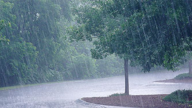

In [103]:
# Option 2
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/weather.jpg'])
img = PILImage.create('images/weather.jpg')
img.to_thumb(192)

In [102]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Categogy: {is_cat}.")
print(f"Probability: {probs[torch.argmax(probs).item()]:.6f}")

Categogy: rain.
Probability: 0.999876
